In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import edward as ed

In [2]:
floatX = 'float32'

In [3]:
np.random.seed(1234)
N = 20

X = np.random.normal(size=[N,3]).astype(floatX)
X[:,0] = (X[:,0] + X[:,1])/2
X[:,2] = (- X[:,0] - X[:,1] + X[:,2])/3
ystd = 0.5
y = 2*X[:,0] + X[:,1] + 0.5*X[:,2] + 3 + np.random.normal(size=N)*ystd

In [4]:
data = [X, y]

In [5]:
params = ed.models.Normal(scale=10., loc=[0.]*4)
y = ed.models.Normal(scale=ystd, loc=sum([params[i]*X[:,i] for i in range(3)]) + params[-1])

In [6]:
qw = ed.models.Empirical(tf.Variable(tf.zeros([3000,4])))

In [13]:
inference = ed.HMC({params: qw}, data={y:data[1]})

/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/edward/util/random_variables.py:52: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \


In [8]:
inference.run(step_size=1e-3)

3000/3000 [100%] ██████████████████████████████ Elapsed: 5s | Acceptance Rate: 1.000


In [9]:
post = qw.params.eval()

In [10]:
post.shape

(3000, 4)

[]

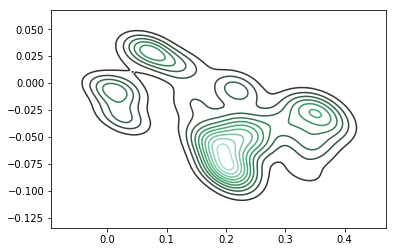

In [12]:
sns.kdeplot(post[:,0], post[:,2])
plt.plot()

In [11]:
post

array([[ 4.7178866e-04, -1.9162702e-03, -2.7247006e-05,  8.2307568e-05],
       [ 3.0946895e-03, -1.7461134e-04, -8.6328987e-04,  2.0513576e-03],
       [ 3.8798074e-03,  1.1357521e-03,  2.0662895e-03,  4.9533821e-03],
       ...,
       [ 3.2467172e-01,  2.7101344e-01, -7.6754242e-02,  1.1413337e+00],
       [ 3.2248220e-01,  2.7017140e-01, -7.4203767e-02,  1.1421293e+00],
       [ 3.2206097e-01,  2.7131081e-01, -7.4852042e-02,  1.1399591e+00]],
      dtype=float32)